<a href="https://colab.research.google.com/github/palienko105/Projects/blob/main/RFM_analysis_Gift_Shop_Python_SQL_part_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.kaggle.com/datasets/ilkeryildiz/online-retail-listing?resource=download

**Задача:**

*Провести RFM-анализ набора данных магазина подарков с целью сегментировать клиентов на группы, основываясь на 3-х показателях. Сделать на основе данных за 2009 отчет в Power BI.*

1.   R (Recency) — насколько давно клиент сделал последний заказ. (1-4)
2.   F (Frequency) — сколько всего заказов сделал клиент. (1-4)
3.   M (Monetary) — сколько денег клиент потратил. (1-4)



*   Анализ буду выполнять с использованием Python и SQL.
*   Анализировать данные буду за 2009 год. На основе полученных результотов попытаюсь предсказать поведение клиентов на январь 2010 года.

In [1]:
url = 'https://drive.google.com/file/d/1WhDrUXKZqhoeLQZB4xgOMKclRYs7kbof/view?usp=share_link'

In [2]:
!gdown --id 1WhDrUXKZqhoeLQZB4xgOMKclRYs7kbof

/usr/local/lib/python3.8/dist-packages/gdown/cli.py:127: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1WhDrUXKZqhoeLQZB4xgOMKclRYs7kbof
To: /content/Gift_Shop_Online_Retail.zip
100% 14.6M/14.6M [00:00<00:00, 104MB/s] 


In [3]:
!unzip /content/Gift_Shop_Online_Retail.zip

Archive:  /content/Gift_Shop_Online_Retail.zip
  inflating: online_retail_listing.csv  


In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sqlite3

In [5]:
sqlite3.sqlite_version

'3.31.1'

In [6]:
con = sqlite3.connect('gift_shob_bd')
cur = con.cursor()

In [7]:
def select (sql):
  return pd.read_sql(sql,con)

In [8]:
df = pd.read_csv('/content/online_retail_listing.csv', sep=';',encoding='latin-1')

In [9]:
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,1.12.2009 07:45,"6,95",13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,1.12.2009 07:45,"6,75",13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,1.12.2009 07:45,"6,75",13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,1.12.2009 07:45,"2,1",13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,1.12.2009 07:45,"1,25",13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
1048570,580501,23284,DOORMAT KEEP CALM AND COME IN,2,4.12.2011 13:00,"8,25",14546.0,United Kingdom
1048571,580501,22507,MEMO BOARD RETROSPOT DESIGN,3,4.12.2011 13:00,"4,95",14546.0,United Kingdom
1048572,580502,22469,HEART OF WICKER SMALL,3,4.12.2011 13:15,"1,65",16931.0,United Kingdom
1048573,580502,23489,VINTAGE BELLS GARLAND,2,4.12.2011 13:15,"2,89",16931.0,United Kingdom


# Краткое описание набора данных:










*   Счет-фактураNo: Номер счета-фактуры. Номинальный. 6-значный интегральный номер, однозначно присваиваемый каждой транзакции. Если этот код начинается с буквы 'c', это означает отмену.
*   Биржевой код: Код товара (товара). Номинальный. 5-значный интегральный номер, однозначно присваиваемый каждому отдельному продукту.
*   Описание: Название продукта (товара). Номинальный.
*   Количество: Количество каждого продукта (позиции) на транзакцию. Числовой.
*   InvoiceDate: дата и время вскрытия. Числовой. День и время генерации транзакции.
*   Цена за единицу: Цена за единицу. Числовой. Цена продукта за единицу в фунтах стерлингов (Â£).
*   CustomerID: Номер клиента. Номинальный. 5-значный интегральный номер, однозначно присваиваемый каждому клиенту.
*   Страна: Название страны. Номинальный. Название страны, в которой проживает клиент.







# Выполнение:

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1048575 non-null  object 
 1   StockCode    1048575 non-null  object 
 2   Description  1044203 non-null  object 
 3   Quantity     1048575 non-null  int64  
 4   InvoiceDate  1048575 non-null  object 
 5   Price        1048575 non-null  object 
 6   Customer ID  811893 non-null   float64
 7   Country      1048575 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 64.0+ MB


In [11]:
df.sort_values('Invoice')

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,1.12.2009 07:45,"6,95",13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,1.12.2009 07:45,"6,75",13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,1.12.2009 07:45,"6,75",13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,1.12.2009 07:45,"2,1",13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,1.12.2009 07:45,"1,25",13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
1046566,C580313,22649,STRAWBERRY FAIRY CAKE TEAPOT,-3,2.12.2011 15:10,"4,95",12668.0,Germany
1046567,C580313,22419,LIPSTICK PEN RED,-6,2.12.2011 15:10,"0,42",12668.0,Germany
1046568,C580313,22303,COFFEE MUG APPLES DESIGN,-2,2.12.2011 15:10,"2,55",12668.0,Germany
1046569,C580313,21232,STRAWBERRY CERAMIC TRINKET POT,-3,2.12.2011 15:10,"1,25",12668.0,Germany


In [12]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [13]:
df['Price'] = (df['Price'].apply(lambda x: x.replace(',','.'))).astype(float)

In [14]:
df.sort_values('InvoiceDate')

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-01-12 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-01-12 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-01-12 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-01-12 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-01-12 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
920140,570876,46000M,POLYESTER FILLER PAD 45x45cm,1,2011-12-10 17:19:00,1.55,16085.0,United Kingdom
920139,570876,46000S,POLYESTER FILLER PAD 40x40cm,1,2011-12-10 17:19:00,1.45,16085.0,United Kingdom
920159,570876,23118,PARISIENNE JEWELLERY DRAWER,2,2011-12-10 17:19:00,7.50,16085.0,United Kingdom
920148,570876,23397,FOOT STOOL HOME SWEET HOME,1,2011-12-10 17:19:00,9.95,16085.0,United Kingdom


In [15]:
df.to_sql('shop',con,if_exists='replace')

/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:2872: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  sql.to_sql(


In [16]:
sql='''
with data_2009 as -- Отберу все данные за 2009 год и уберу отмененные заказы
-- и посчитаю (price * Quantity)
(
  select *, (price * Quantity) as full_price
  from shop 
  where strftime('%Y',InvoiceDate) < '2010' and Invoice not like 'c%'
  order by Invoice
),
rfm_table as -- Рассчитаем 3 критерия recency, frequency, monetary
(
  select *,(julianday(cur_date) - julianday(fresh_date)) as recency
  from
  (
    select [Customer ID],max(InvoiceDate) as fresh_date, sum(full_price) as monetary, count(distinct Invoice) as frequency, date('2010-01-01') as cur_date
    from data_2009
    group by [Customer ID]
  ) x
)

select [Customer ID], recency, frequency, monetary, cur_date
from rfm_table
where [Customer ID] is not null --Берем только тех клиентов, у которых известен [Customer ID]
'''

In [17]:
rfm = select (sql)

In [18]:
rfm

,Customer ID,recency,frequency,monetary,cur_date
0,12346.0,13.545139,5,113.50,2010-01-01
1,12358.0,141.667361,1,1429.83,2010-01-01
2,12359.0,15.358333,2,838.89,2010-01-01
3,12362.0,353.576389,1,130.00,2010-01-01
4,12417.0,80.524306,2,317.60,2010-01-01
...,...,...,...,...,...
950,18268.0,49.564583,1,375.18,2010-01-01
951,18271.0,141.522917,1,192.55,2010-01-01
952,18275.0,141.317361,1,372.64,2010-01-01
953,18276.0,80.281944,1,218.05,2010-01-01


In [19]:
rfm.describe()

,Customer ID,recency,frequency,monetary
count,955.000000,955.000000,955.000000,955.000000
mean,15411.058639,117.012023,1.583246,719.009592
std,1675.331824,118.673494,1.373656,1858.267444
min,12346.000000,8.293056,1.000000,2.950000
25%,13994.000000,15.488889,1.000000,205.395000
50%,15421.000000,80.163889,1.000000,338.340000
75%,16889.000000,202.486806,2.000000,666.870000
max,18286.000000,353.619444,15.000000,41005.740000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1c37c00cd0>,
      dtype=object)

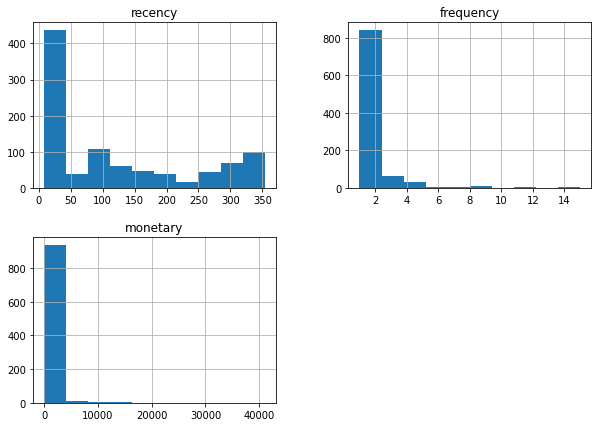

In [20]:
rfm[['recency', 'frequency', 'monetary']].hist(figsize=(10,7))

In [21]:
(rfm['monetary']>5000).mean()

0.016753926701570682

Клиентов с общей суммой заказов более 5000 примерно 1.7%

In [22]:
(4-(pd.qcut(rfm['recency'], 4,labels=False))).value_counts().sort_index()

1    239
2    238
3    238
4    240
Name: recency, dtype: int64

In [23]:
rfm['r'] = (4-(pd.qcut(rfm['recency'], 4,labels=False)))

In [24]:
rfm.sort_values('r')

,Customer ID,recency,frequency,monetary,cur_date,r
715,16887.0,353.429861,1,219.82,2010-01-01,1
290,14258.0,263.641667,1,1261.00,2010-01-01,1
451,15255.0,294.618056,1,260.44,2010-01-01,1
450,15240.0,233.377083,1,549.77,2010-01-01,1
449,15223.0,233.528472,1,230.20,2010-01-01,1
...,...,...,...,...,...,...
307,14404.0,11.385417,2,238.89,2010-01-01,4
735,17028.0,13.397222,1,307.91,2010-01-01,4
309,14415.0,15.411111,1,519.53,2010-01-01,4
296,14293.0,9.610417,2,934.45,2010-01-01,4


In [25]:
(pd.qcut(rfm['frequency'], 4, duplicates='drop')).value_counts().sort_index()

(0.999, 2.0]    842
(2.0, 15.0]     113
Name: frequency, dtype: int64

In [26]:
rfm[rfm['frequency']>2]['frequency'].value_counts().sort_index()

3     61
4     22
5     10
6      4
7      4
8      2
9      5
10     1
12     2
14     1
15     1
Name: frequency, dtype: int64

In [27]:
def f_score(x):
  if x <= 2:
    return 1
  if x <= 4:
    return 2
  if x <= 6:
    return 3
  else:
    return 4

In [28]:
rfm['f'] = rfm['frequency'].apply(f_score)

In [29]:
((pd.qcut(rfm['monetary'], 4,labels=False))+1).value_counts().sort_index()

1    239
2    239
3    238
4    239
Name: monetary, dtype: int64

In [30]:
rfm['m'] = ((pd.qcut(rfm['monetary'], 4,labels=False))+1)

In [31]:
rfm['rfm'] = rfm['r'].astype(str) + rfm['f'].astype(str) + rfm['m'].astype(str)

In [32]:
rfm = rfm.sort_values('rfm').reset_index(drop=True)

In [33]:
rfm

,Customer ID,recency,frequency,monetary,cur_date,r,f,m,rfm
0,13585.0,353.377778,1,12.75,2010-01-01,1,1,1,111
1,14000.0,322.590278,1,192.00,2010-01-01,1,1,1,111
2,15571.0,202.493056,1,118.26,2010-01-01,1,1,1,111
3,14980.0,322.410417,1,150.68,2010-01-01,1,1,1,111
4,14958.0,294.331944,1,186.36,2010-01-01,1,1,1,111
...,...,...,...,...,...,...,...,...,...
950,14911.0,13.401389,9,7119.24,2010-01-01,4,4,4,444
951,14156.0,10.455556,7,11051.22,2010-01-01,4,4,4,444
952,14606.0,10.393750,8,1486.60,2010-01-01,4,4,4,444
953,13694.0,8.668750,12,20427.91,2010-01-01,4,4,4,444


[Text(0, 0.5, 'Число клиентов'), Text(0.5, 0, 'Категории клиентов')]

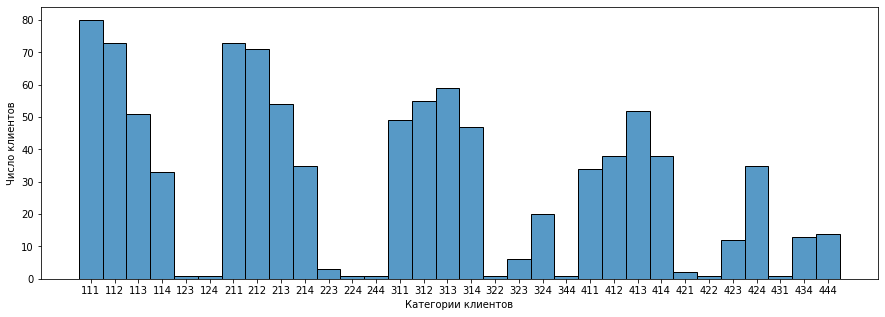

In [34]:
plt.figure(figsize=(15,5))
g = sns.histplot(data=rfm, x='rfm')
g.set (xlabel='Категории клиентов', ylabel='Число клиентов')

In [35]:
rfm.value_counts('rfm').sort_index()

rfm
111    80
112    73
113    51
114    33
123     1
124     1
211    73
212    71
213    54
214    35
223     3
224     1
244     1
311    49
312    55
313    59
314    47
322     1
323     6
324    20
344     1
411    34
412    38
413    52
414    38
421     2
422     1
423    12
424    35
431     1
434    13
444    14
dtype: int64


*   Покупатели с rfm = '111' - клиенты, которые совершали последнюю покупку давно, частота покупок низкая, общая сумма покупок низкая. Таких клиентов можно попытаться вернуть в магазин, предложить им специальное предложение.
*   Покупатели с rfm = '444' - клиенты, которые совершали последнюю покупку недавно, частота покупок высокая, общая сумма покупок высокая. Самые лучшие клиенты. Таким клиентам можно предлагать новые продукты с различной стоимостью.
*   Покупатели с rfm = '414' - клиенты, которые совершали последнюю покупку недавно, частота покупок низкая, общая сумма покупок высокая. Таких клиентов можно замотивировать совершить вторую покупку путем начисления им бонусных баллов на следующую  покупку или скидку на второй или третий заказ.
*   Покупатели с rfm = '411' - клиенты, которые совершали последнюю покупку недавно, частота покупок низкая, общая сумма покупок низкая. Вероятнее всего это новые клиенты, которые не успели совершить большое количество покупок. Таким клиентам нужно правильно презентовать бренд, чтобы замотивировать их на долгосрочное сотрудничество.
*   Для клиентов с низким чеком, можно предлагать дополнительные товары за низкую цену, чтобы немного повысить их средний чек.    

и т.д.




In [36]:
rfm['rfm_score'] = rfm['r'] + rfm['f'] + rfm['m']

In [37]:
rfm.sort_values('rfm_score',ascending=False)

,Customer ID,recency,frequency,monetary,cur_date,r,f,m,rfm,rfm_score
954,14527.0,13.484028,7,5644.28,2010-01-01,4,4,4,444,12
947,15311.0,9.519444,14,9370.24,2010-01-01,4,4,4,444,12
941,18102.0,9.403472,9,41005.74,2010-01-01,4,4,4,444,12
942,17841.0,11.438889,8,2844.50,2010-01-01,4,4,4,444,12
943,17961.0,8.487500,12,743.33,2010-01-01,4,4,4,444,12
...,...,...,...,...,...,...,...,...,...,...
55,16126.0,322.434722,1,174.10,2010-01-01,1,1,1,111,3
56,17076.0,263.491667,1,67.68,2010-01-01,1,1,1,111,3
57,15999.0,263.478472,1,20.40,2010-01-01,1,1,1,111,3
58,17035.0,294.557639,1,54.60,2010-01-01,1,1,1,111,3


In [38]:
rfm.describe()

,Customer ID,recency,frequency,monetary,r,f,m,rfm_score
count,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000
mean,15411.058639,117.012023,1.583246,719.009592,2.501571,1.166492,2.499476,6.167539
std,1675.331824,118.673494,1.373656,1858.267444,1.120023,0.518553,1.119088,2.067821
min,12346.000000,8.293056,1.000000,2.950000,1.000000,1.000000,1.000000,3.000000
25%,13994.000000,15.488889,1.000000,205.395000,1.500000,1.000000,1.500000,5.000000
50%,15421.000000,80.163889,1.000000,338.340000,3.000000,1.000000,2.000000,6.000000
75%,16889.000000,202.486806,2.000000,666.870000,4.000000,1.000000,3.500000,8.000000
max,18286.000000,353.619444,15.000000,41005.740000,4.000000,4.000000,4.000000,12.000000


In [39]:
rfm['RFM_category'] = (pd.qcut(rfm['rfm_score'], 5,labels=False)+1)

В данном примере выделил 5 групп, на самом деле таких групп может быть гораздо больше.

In [40]:
def cat(x):
  if x == 1: # Самые низкие показатели за последнее время по всем трем пунктам.
    return 'Потерянные клиенты'
  if x == 2: # Клиенты с низкими показателями, но с которыми можно и нужно работать.
    return 'В зоне риска потери'
  if x == 3: # Средние показатели по 3 пунктам. Таким клиентам можно предлагать подборки товаров, составленные на основе прошлых покупок.
    return 'Клиенты, нуждающиеся во внимании'
  if x == 4: # У данных клиентов показатели выше среднего. С такими клиентами нужно работать, чтобы вывести их на уровень чемпионов.
    return 'Потенциальные лоялисты'
  else: # Лучшие клиенты по всем показателям. Таких клиентов нужно награждать, чтобы они оставались на таком же уровне.
    return 'Чемпионы'


In [41]:
rfm['category'] = rfm['RFM_category'].apply(cat)

In [42]:
rfm

,Customer ID,recency,frequency,monetary,cur_date,r,f,m,rfm,rfm_score,RFM_category,category
0,13585.0,353.377778,1,12.75,2010-01-01,1,1,1,111,3,1,Потерянные клиенты
1,14000.0,322.590278,1,192.00,2010-01-01,1,1,1,111,3,1,Потерянные клиенты
2,15571.0,202.493056,1,118.26,2010-01-01,1,1,1,111,3,1,Потерянные клиенты
3,14980.0,322.410417,1,150.68,2010-01-01,1,1,1,111,3,1,Потерянные клиенты
4,14958.0,294.331944,1,186.36,2010-01-01,1,1,1,111,3,1,Потерянные клиенты
...,...,...,...,...,...,...,...,...,...,...,...,...
950,14911.0,13.401389,9,7119.24,2010-01-01,4,4,4,444,12,5,Чемпионы
951,14156.0,10.455556,7,11051.22,2010-01-01,4,4,4,444,12,5,Чемпионы
952,14606.0,10.393750,8,1486.60,2010-01-01,4,4,4,444,12,5,Чемпионы
953,13694.0,8.668750,12,20427.91,2010-01-01,4,4,4,444,12,5,Чемпионы


[Text(0, 0.5, 'Число клиентов'), Text(0.5, 0, 'Категории клиентов')]

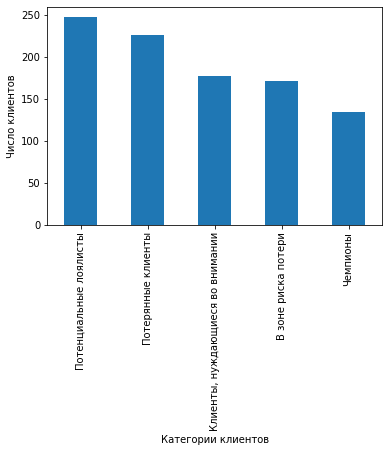

In [43]:
gr = rfm.value_counts('category').plot(kind='bar')
gr.set(xlabel='Категории клиентов', ylabel='Число клиентов')

# Проверим насколько точными оказались результаты сегментации в 2009 году. Для этого используем итоговую модель и посмотрим как будут вести себя клиенты в январе 2010 года.

In [44]:
rfm

,Customer ID,recency,frequency,monetary,cur_date,r,f,m,rfm,rfm_score,RFM_category,category
0,13585.0,353.377778,1,12.75,2010-01-01,1,1,1,111,3,1,Потерянные клиенты
1,14000.0,322.590278,1,192.00,2010-01-01,1,1,1,111,3,1,Потерянные клиенты
2,15571.0,202.493056,1,118.26,2010-01-01,1,1,1,111,3,1,Потерянные клиенты
3,14980.0,322.410417,1,150.68,2010-01-01,1,1,1,111,3,1,Потерянные клиенты
4,14958.0,294.331944,1,186.36,2010-01-01,1,1,1,111,3,1,Потерянные клиенты
...,...,...,...,...,...,...,...,...,...,...,...,...
950,14911.0,13.401389,9,7119.24,2010-01-01,4,4,4,444,12,5,Чемпионы
951,14156.0,10.455556,7,11051.22,2010-01-01,4,4,4,444,12,5,Чемпионы
952,14606.0,10.393750,8,1486.60,2010-01-01,4,4,4,444,12,5,Чемпионы
953,13694.0,8.668750,12,20427.91,2010-01-01,4,4,4,444,12,5,Чемпионы


In [45]:
df2010 = df[(df['InvoiceDate'] >= '2010-01-01') & (df['InvoiceDate'] < '2010-02-01')].sort_values('InvoiceDate')

In [46]:
df2010['full_price_january'] = df2010['Price'] * df2010['Quantity']

In [47]:
df2010 = df2010[~df['Invoice'].str.contains('C')]

<ipython-input-47-92c214a9203b>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df2010 = df2010[~df['Invoice'].str.contains('C')]


In [48]:
df2010 = df2010.groupby('Customer ID').agg({'full_price_january':'sum'}).reset_index()

In [49]:
df2010 = df2010[~df2010['Customer ID'].isna()]

In [50]:
df2010

,Customer ID,full_price_january
0,12346.0,45.00
1,12361.0,109.20
2,12391.0,410.34
3,12404.0,63.24
4,12417.0,447.82
...,...,...
932,18258.0,343.42
933,18259.0,306.30
934,18260.0,619.78
935,18266.0,251.10


In [51]:
rfm_new = rfm.merge(df2010,how='left',on='Customer ID')

In [52]:
rfm_new

,Customer ID,recency,frequency,monetary,cur_date,r,f,m,rfm,rfm_score,RFM_category,category,full_price_january
0,13585.0,353.377778,1,12.75,2010-01-01,1,1,1,111,3,1,Потерянные клиенты,NaN
1,14000.0,322.590278,1,192.00,2010-01-01,1,1,1,111,3,1,Потерянные клиенты,NaN
2,15571.0,202.493056,1,118.26,2010-01-01,1,1,1,111,3,1,Потерянные клиенты,NaN
3,14980.0,322.410417,1,150.68,2010-01-01,1,1,1,111,3,1,Потерянные клиенты,NaN
4,14958.0,294.331944,1,186.36,2010-01-01,1,1,1,111,3,1,Потерянные клиенты,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
950,14911.0,13.401389,9,7119.24,2010-01-01,4,4,4,444,12,5,Чемпионы,11661.54
951,14156.0,10.455556,7,11051.22,2010-01-01,4,4,4,444,12,5,Чемпионы,5337.63
952,14606.0,10.393750,8,1486.60,2010-01-01,4,4,4,444,12,5,Чемпионы,1668.47
953,13694.0,8.668750,12,20427.91,2010-01-01,4,4,4,444,12,5,Чемпионы,19702.12


In [53]:
rfm_table1 = rfm_new.pivot_table(values='monetary', index='r', columns='f', aggfunc='sum')

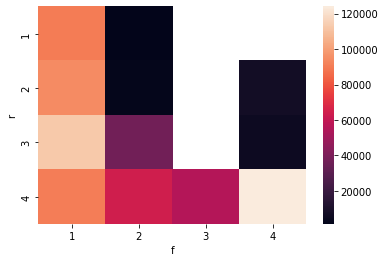

In [54]:
sns.heatmap(rfm_table1)

In [55]:
rfm_table1 = rfm_new.pivot_table(values='full_price_january', index='r', columns='f', aggfunc='sum')

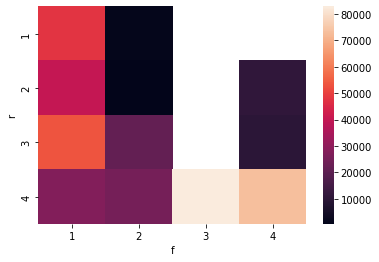

In [56]:
sns.heatmap(rfm_table1)

На первом тепловой карте видно, что общая сумма заказов за 2009 год больше у клиентов с 'rfm' == '444' (самые активные клиенты).
Дальее идут клиенты с низкой частотой покупок ('f' == 1, таких клиентов очень много).   


На второй тепловой карте используется аналогичная модель, только вместо общей суммы заказов за 2009 год поставил общую сумму заказов за январь 2010 года. На втором рисунке наблюдается похожая картина: Клиенты с самыми высокими показателями 'f' и 'r' совершают покупки на большие суммы. Далее идут клиенты с низкой  частотой покупок.

 

В целом тепловые карты очень похожи. На основе полученных результотов можно сделать вывод: На основе данных за 2009 год, можно сделать предположение о том как поведут себя те или иные покупатели в будущем.

In [57]:
len(rfm_new[rfm_new['f']==1])/len(rfm_new)

0.881675392670157

# Выгружу данные в Excel для дальнейшего созданию отчета в Power BI

In [58]:
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-01-12 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-01-12 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-01-12 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-01-12 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-01-12 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
1048570,580501,23284,DOORMAT KEEP CALM AND COME IN,2,2011-04-12 13:00:00,8.25,14546.0,United Kingdom
1048571,580501,22507,MEMO BOARD RETROSPOT DESIGN,3,2011-04-12 13:00:00,4.95,14546.0,United Kingdom
1048572,580502,22469,HEART OF WICKER SMALL,3,2011-04-12 13:15:00,1.65,16931.0,United Kingdom
1048573,580502,23489,VINTAGE BELLS GARLAND,2,2011-04-12 13:15:00,2.89,16931.0,United Kingdom


In [59]:
df2009 = df[(df['InvoiceDate'] >= '2009-01-01') & (df['InvoiceDate'] < '2010-01-01')].sort_values('InvoiceDate')

In [60]:
df2009['full_price_january'] = df2009['Price'] * df2009['Quantity']

In [61]:
df2009 = df2009[~df['Invoice'].str.contains('C')]

<ipython-input-61-522e702bdfda>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df2009 = df2009[~df['Invoice'].str.contains('C')]


In [62]:
df2009 = df2009[~df2009['Customer ID'].isna()]

In [63]:
df2009

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,full_price_january
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-01-12 07:45:00,6.95,13085.0,United Kingdom,83.40
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-01-12 07:45:00,6.75,13085.0,United Kingdom,81.00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-01-12 07:45:00,6.75,13085.0,United Kingdom,81.00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-01-12 07:45:00,2.10,13085.0,United Kingdom,100.80
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-01-12 07:45:00,1.25,13085.0,United Kingdom,30.00
...,...,...,...,...,...,...,...,...,...
45219,493407,21993,FLORAL FOLK STATIONERY SET,1,2009-12-23 16:04:00,2.95,17867.0,United Kingdom,2.95
45220,493407,21992,VINTAGE PAISLEY STATIONERY SET,1,2009-12-23 16:04:00,2.95,17867.0,United Kingdom,2.95
45221,493407,21991,BOHEMIAN COLLAGE STATIONERY SET,1,2009-12-23 16:04:00,2.95,17867.0,United Kingdom,2.95
45222,493407,21034,REX CASH+CARRY JUMBO SHOPPER,10,2009-12-23 16:04:00,0.95,17867.0,United Kingdom,9.50


In [64]:
df2009 = df2009.merge(rfm, how='inner',on='Customer ID')

In [65]:
df2009

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,full_price_january,recency,frequency,monetary,cur_date,r,f,m,rfm,rfm_score,RFM_category,category
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-01-12 07:45:00,6.95,13085.0,United Kingdom,83.4,294.411806,4,1096.80,2010-01-01,1,2,4,124,7,4,Потенциальные лоялисты
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-01-12 07:45:00,6.75,13085.0,United Kingdom,81.0,294.411806,4,1096.80,2010-01-01,1,2,4,124,7,4,Потенциальные лоялисты
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-01-12 07:45:00,6.75,13085.0,United Kingdom,81.0,294.411806,4,1096.80,2010-01-01,1,2,4,124,7,4,Потенциальные лоялисты
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-01-12 07:45:00,2.10,13085.0,United Kingdom,100.8,294.411806,4,1096.80,2010-01-01,1,2,4,124,7,4,Потенциальные лоялисты
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-01-12 07:45:00,1.25,13085.0,United Kingdom,30.0,294.411806,4,1096.80,2010-01-01,1,2,4,124,7,4,Потенциальные лоялисты
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30756,493395,21973,SET OF 36 MUSHROOM PAPER DOILIES,12,2009-12-23 13:41:00,1.45,12539.0,Spain,17.4,8.429861,2,5149.06,2010-01-01,4,1,4,414,9,5,Чемпионы
30757,493395,21974,SET OF 36 PAISLEY FLOWER DOILIES,12,2009-12-23 13:41:00,1.45,12539.0,Spain,17.4,8.429861,2,5149.06,2010-01-01,4,1,4,414,9,5,Чемпионы
30758,493395,21976,PACK OF 60 MUSHROOM CAKE CASES,24,2009-12-23 13:41:00,0.55,12539.0,Spain,13.2,8.429861,2,5149.06,2010-01-01,4,1,4,414,9,5,Чемпионы
30759,493395,21299,EDWARDIAN TOILET ROLL UNIT,4,2009-12-23 13:41:00,12.75,12539.0,Spain,51.0,8.429861,2,5149.06,2010-01-01,4,1,4,414,9,5,Чемпионы


In [66]:
df2009.sort_values('monetary')

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,full_price_january,recency,frequency,monetary,cur_date,r,f,m,rfm,rfm_score,RFM_category,category
29519,492530,21740,COSY SLIPPER SHOES LARGE RED,1,2009-12-17 12:49:00,2.95,14095.0,United Kingdom,2.95,14.465972,1,2.95,2010-01-01,4,1,1,411,6,3,"Клиенты, нуждающиеся во внимании"
3740,489613,22165,"DIAMANTE HEART SHAPED WALL MIRROR,",1,2009-01-12 14:56:00,12.75,13585.0,United Kingdom,12.75,353.377778,1,12.75,2010-01-01,1,1,1,111,3,1,Потерянные клиенты
24009,491447,47504J,ENGLISH ROSE SET/3 GARDEN TOOLS,2,2009-11-12 10:48:00,7.95,14191.0,United Kingdom,15.90,49.550000,1,15.90,2010-01-01,3,1,1,311,5,2,В зоне риска потери
3757,489634,21814,HEART T-LIGHT HOLDER,12,2009-01-12 15:19:00,1.45,13381.0,United Kingdom,17.40,353.361806,1,17.40,2010-01-01,1,1,1,111,3,1,Потерянные клиенты
12212,490159,20685,RED SPOTTY COIR DOORMAT,1,2009-04-12 10:48:00,6.75,13666.0,United Kingdom,6.75,263.550000,1,19.50,2010-01-01,1,1,1,111,3,1,Потерянные клиенты
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,490059,85014A,BLACK/BLUE DOTS RUFFLED UMBRELLA,576,2009-03-12 13:30:00,3.00,18102.0,United Kingdom,1728.00,9.403472,9,41005.74,2010-01-01,4,4,4,444,12,5,Чемпионы
121,490059,15056N,EDWARDIAN PARASOL NATURAL,600,2009-03-12 13:30:00,3.00,18102.0,United Kingdom,1800.00,9.403472,9,41005.74,2010-01-01,4,4,4,444,12,5,Чемпионы
120,490059,85014C,BLUE/BROWN DOTS RUFFLED UMBRELLA,192,2009-03-12 13:30:00,3.00,18102.0,United Kingdom,576.00,9.403472,9,41005.74,2010-01-01,4,4,4,444,12,5,Чемпионы
127,490061,84912A,PINK ROSE WASHBAG,600,2009-03-12 13:42:00,2.00,18102.0,United Kingdom,1200.00,9.403472,9,41005.74,2010-01-01,4,4,4,444,12,5,Чемпионы


In [67]:
df2009.to_excel('shop2009.xlsx',index=False)

In [68]:
df2009['full_price_january'].sum()

686654.16